<a href="https://colab.research.google.com/github/AnIsAsPe/RNN-Resumenes-de-Texto/blob/main/Notebooks/Word_embeddings_Word2Vec_espa%C3%B1ol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import gensim         # Procesamiento de lenguaje natural (NPL)

import matplotlib.pyplot as plt 
import seaborn as sns  

# Cargar vectores de palabras Word2Vec en español
Bajaremos los vectores word2vec en español entrenado con un corpus de 3 mil millones de palabras provenientes de noticias, Wikipedia, obras literiarias, entre otras fuentes.

Cuenta con cerca de 2 millones vectores de 400 dimensiones correspondientes a 3  palabras y frases en inglés

In [2]:
#!wget wget -c "https://zenodo.org/record/1410403/files/keyed_vectors.zip"
#!unzip /content/keyed_vectors.zip -d /content/drive/MyDrive/Datos/Embeddings/Spanish3B_words_Word2Vec/

In [3]:
from gensim.models import KeyedVectors  #comparación keyedVectors y fullmodels https://radimrehurek.com/gensim/models/keyedvectors.html

w2v = gensim.models.KeyedVectors.load('/content/drive/MyDrive/Datos/Embeddings/Spanish3B_words_Word2Vec/complete.kv', mmap='r')

In [4]:
vocabulario = w2v.index2word  #lista con todas las palabras

print('Tamaño del vocabulario', len(vocabulario))

Tamaño del vocabulario 1943871


In [5]:
print(type(w2v['curso'])) 
w2v['curso'].shape

<class 'numpy.memmap'>


(400,)

numpy.memmap es un vector mapeado en memoria que se lee de un archivo binario en disco, sirve para acceder a pequeños segmenteos de grandes archivos en disco sin leer el archivo completo en la memoria

# Creación de diccionario de palabras y vectores

In [6]:
%%time
dic_word2vec  = {}
for palabra in w2v.index2word:
  dic_word2vec[palabra] = w2v[palabra]


CPU times: user 14.2 s, sys: 466 ms, total: 14.6 s
Wall time: 14.2 s


In [7]:
type(dic_word2vec['planta'])

numpy.memmap

# Ejemplos de vectores de palabras

In [8]:
ejemplos = 'hombre mujer niño niña anciano anciana'.split()

#Construcción de un dataframe con los vectores de las palabras elegidas
vectores = {palabra: w2v[palabra] for palabra in ejemplos}
X = pd.DataFrame.from_dict(vectores, orient='index')

X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
hombre,-1.314959,-1.988723,-0.186212,0.961444,2.206900,0.443114,-2.331165,1.389492,1.694686,-2.246100,-0.543617,0.363157,-0.676042,2.319879,-0.092209,-4.469724,1.106810,1.183173,2.460131,1.069661,-0.152188,0.140449,-1.809752,0.704750,1.914246,0.876190,-0.545694,1.587349,0.318975,-0.920872,1.505912,1.410535,-1.391593,0.935539,1.057706,-1.085885,3.004159,-3.468736,-0.088044,-2.187041,...,0.403152,1.718250,1.175799,1.517562,1.238738,1.629143,3.377792,0.035849,-1.063898,-0.106362,3.431478,-1.175779,-1.317961,-1.257704,1.358864,1.078265,0.756954,3.152755,2.109745,-0.360549,2.091900,1.864231,0.541319,4.605249,1.182767,-0.731153,0.436539,-1.251345,0.091795,0.702712,2.126309,-2.004818,-0.539526,2.057134,0.095133,-1.247631,1.805603,-1.157527,2.253980,0.995769
mujer,-2.077840,-0.550113,-2.241080,-1.130049,0.423485,1.253572,1.823793,1.564688,1.346433,-0.638080,0.718747,2.082812,2.872498,-1.031655,-0.661740,-3.206461,-0.509890,-3.760481,0.001092,-2.144511,3.550493,3.000413,-2.547569,2.514799,1.015022,1.914981,0.779757,1.750895,-1.434963,-0.089325,2.601514,0.885652,-2.148863,1.752633,2.555921,-0.960628,1.482399,-0.523788,-1.101255,-0.505045,...,1.222360,2.416243,-0.703811,-0.109421,0.035652,0.753843,0.990145,-1.427120,-0.407840,-1.218591,-0.482682,0.002427,1.004573,-0.546611,3.627699,2.080340,0.602916,1.247518,1.789270,-1.504276,-0.039075,-2.548123,-0.478504,3.068811,0.713750,1.206726,0.421383,0.431425,-1.676448,0.433260,2.047893,0.802070,1.143705,-2.771217,1.040919,1.405972,0.779694,1.193938,-1.475454,-0.874034
niño,-0.980197,0.379168,-1.628490,0.740260,0.672754,-1.611383,-1.487341,1.693398,0.300244,0.611260,-1.735255,0.254893,-0.747957,1.091056,-2.102689,-4.413056,0.428943,1.039562,1.646071,1.048418,1.482444,1.643812,-2.762619,0.950580,0.897408,1.653119,-1.238674,1.603271,-2.337970,0.789280,2.167291,-0.994375,-2.532823,0.314926,0.154927,-0.089571,3.712525,-1.085010,-1.043212,-2.828499,...,1.871182,0.851275,1.092486,1.948299,2.359697,-0.117860,2.453972,-0.885612,-0.703617,1.480777,3.442777,0.845041,-1.382100,0.253672,0.558462,2.096420,-0.256446,1.310260,2.912922,1.648818,0.530599,1.488136,-0.625203,2.994253,2.325003,0.646209,2.943862,-1.770269,1.498120,-1.534529,3.418673,-3.246452,-0.482264,1.422405,-0.443792,-2.026980,1.862297,-2.109965,1.405739,0.889196
niña,-0.785558,1.140642,-2.783046,-0.986584,-0.662401,-0.999821,1.575360,0.772627,0.090723,1.891370,-0.373941,1.491087,2.276384,-2.056633,-2.088986,-2.137943,-1.328212,-1.773335,-0.420989,-1.302265,3.565552,3.168905,-2.650481,2.158140,-0.434004,2.045550,0.113642,2.403959,-3.002270,1.784295,3.801080,-1.343811,-2.056848,1.578986,1.769081,0.114273,0.478200,-0.743785,-1.444750,0.069009,...,1.533874,1.761465,-0.524468,1.577509,1.176407,-0.273637,0.817464,-1.701148,-0.402293,0.466334,0.488580,0.654070,0.913581,-0.542085,1.834533,1.176269,0.620123,0.070635,2.385162,0.248689,0.151588,-1.359016,-1.449648,2.918449,1.254136,0.245280,0.927801,-0.348792,0.362225,-0.539734,2.501076,-1.100758,1.321898,-1.026753,0.476598,-0.970495,2.535088,-0.669446,-1.908800,-0.699129
anciano,-1.462609,-0.177823,0.412988,0.387187,0.530428,1.525067,-0.157156,1.564358,1.989367,0.003270,-0.914918,0.583195,-0.820515,-0.117726,-0.494654,-2.215802,2.039873,0.462180,1.556737,1.666347,0.652212,0.014893,-1.924016,0.849655,1.690767,1.906965,1.524884,0.641604,-0.015185,-0.884319,0.090098,1.343909,-1.789376,1.778029,1.012090,-0.300560,2.746173,-1.486383,1.138323,-2.795365,...,1.387876,0.522947,1.451987,0.973093,-1.065284,-0.935456,2.507853,1.382716,-0.493742,0.982242,1.580078,-0.514908,-0.497724,-0.716229,2.315726,-0.505803,0.416112,-1.350733,2.506332,-0.414722,0.610488,0.597142,1.830986,2.866012,-0.293419,-1.018079,2.136091,-1.221731,-1.028689,-0.656090,2.1258

## Visualización de vectores

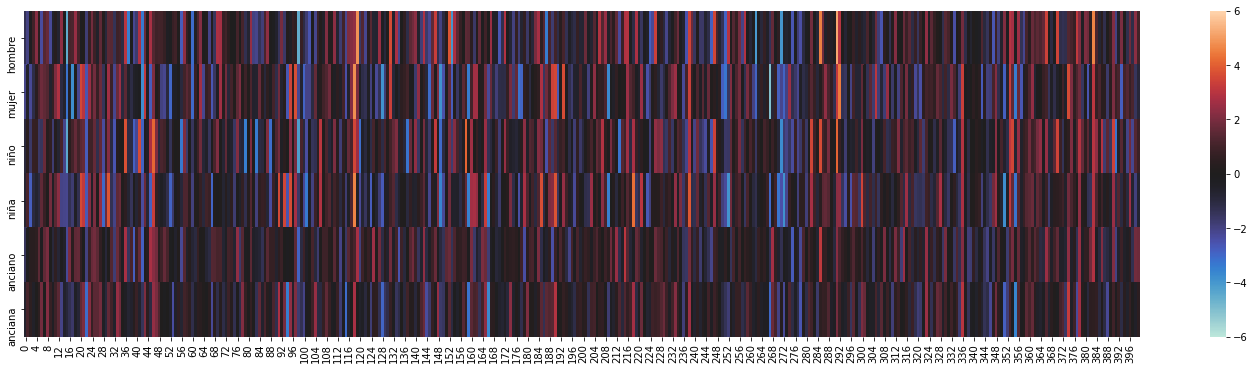

In [9]:
#Visualización de los vectores de las palabas elegidas
fig = plt.figure(figsize = (25, 6))
ax = sns.heatmap(X, vmin = -6, vmax = 6,center = 0)

##Visualización de vectores en un espacio tridimensional

In [10]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pd.DataFrame(pca.fit_transform(X), index = X.index)
components.reset_index(inplace=True)


fig = px.scatter_3d( components, x=0, y=1, z=2, color='index',  
                    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

In [11]:
[w2v['hombre']-w2v['mujer']]

[array([ 0.7628809 , -1.4386101 ,  2.0548685 ,  2.0914934 ,  1.7834146 ,
        -0.8104584 , -4.154958  , -0.1751957 ,  0.34825277, -1.60802   ,
        -1.2623632 , -1.7196543 , -3.54854   ,  3.351534  ,  0.5695308 ,
        -1.2632623 ,  1.6167002 ,  4.9436536 ,  2.4590392 ,  3.214172  ,
        -3.7026806 , -2.8599644 ,  0.73781717, -1.8100488 ,  0.89922345,
        -1.0387917 , -1.3254509 , -0.16354644,  1.7539374 , -0.83154774,
        -1.0956023 ,  0.5248827 ,  0.7572702 , -0.81709343, -1.4982146 ,
        -0.12525773,  1.5217601 , -2.9449482 ,  1.0132104 , -1.6819961 ,
        -1.363467  ,  2.9853666 ,  0.42618132, -1.3999314 ,  0.5744263 ,
         5.504633  , -0.7389883 ,  0.8034538 ,  0.5477418 ,  2.9657767 ,
         2.878543  ,  0.65130866,  2.7574172 ,  1.189704  ,  1.2988429 ,
         0.24356966, -1.7916973 ,  1.3429799 , -0.75896305, -1.2529657 ,
        -0.05142879, -1.2127932 ,  1.1286122 , -0.44188237,  2.1150837 ,
        -0.5200582 , -3.0769124 ,  2.8170362 ,  0.0

# Similitud (coseno) entre vectores

In [12]:
def similitud_coseno(a_vector, b_vector):
    '''Calcula la similitud coseno entre los vectores a y b'''

    numerador = np.dot(a_vector, b_vector)
    
    a_norm = np.sqrt(np.sum(a_vector**2))  
    b_norm = np.sqrt(np.sum(b_vector**2))
    
    denominador = a_norm * b_norm
    
    similitud_coseno = numerador / denominador 
    
    return similitud_coseno

In [13]:
similitud_coseno(w2v['computadora'], w2v['calculadora'])

0.528302

In [14]:
def encuentra_similitudes(palabra, texto):
  lista = texto.split()
  lista.append(palabra)
  vectores = {}
  for p in lista:
    vectores[p] = w2v[p]
  X = pd.DataFrame.from_dict(vectores, orient='index')

  pca = PCA(n_components=3)
  components = pd.DataFrame(pca.fit_transform(X), index = X.index)
  components.reset_index(inplace=True)

  fig = px.scatter_3d( 
        components, x=0, y=1, z=2, color='index',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
  fig.show()

  palabra_vec = X.loc[palabra, :]
  similitud={}
  for p in lista[:-1]:
    p_vec = X.loc[p,:]
    similitud[p] = similitud_coseno(palabra_vec, p_vec)
  print(pd.Series(similitud).sort_values())


In [15]:
encuentra_similitudes('perro', 'gato pájaro tiburón libélula lobo mariposa araña ardilla')

mariposa    0.172968
libélula    0.180578
araña       0.242797
ardilla     0.387270
tiburón     0.566994
pájaro      0.619912
lobo        0.683267
gato        0.852810
dtype: float64


In [16]:
def encuentra_palabra(a, b, c):
    a, b, c = a.lower(), b.lower(), c.lower()
    a_vector, b_vector, c_vector = w2v[a], w2v[b], w2v[c]

    max_similitud = -1000 #la inicializamos con una similaridad alejada
    mas_parecida = None
    
    for palabra in vocabulario:
        if palabra in [a, b, c]:
            continue
            
        sim_coseno = similitud_coseno(np.subtract(b_vector, a_vector), np.subtract(dic_word2vec[palabra], c_vector))
        
        if sim_coseno > max_similitud:
            max_similitud = sim_coseno
            mas_parecida = palabra
            
    return mas_parecida, sim_coseno

In [29]:
%time encuentra_palabra('hombre', 'rey', 'mujer')

CPU times: user 1min 20s, sys: 1.71 s, total: 1min 22s
Wall time: 1min 20s


('reina', 0.20591584)

In [26]:
%time w2v.most_similar(positive=['rey','mujer'],negative=['hombre'])

CPU times: user 507 ms, sys: 45.1 ms, total: 552 ms
Wall time: 315 ms


[('reina', 0.7011107802391052),
 ('princesa', 0.6539173126220703),
 ('emperatriz', 0.6132392883300781),
 ('esposa', 0.5980263948440552),
 ('doncella', 0.596245527267456),
 ('dama', 0.5885013341903687),
 ('infanta', 0.5754831433296204),
 ('concubina', 0.5528373122215271),
 ('hija', 0.5507358312606812),
 ('viuda', 0.538551390171051)]

In [18]:
%time w2v.most_similar(positive=['día','blanco'],negative=['noche'])

CPU times: user 3.13 s, sys: 4.49 s, total: 7.62 s
Wall time: 7.42 s


[('negro', 0.5269008874893188),
 ('amarillo', 0.4956654906272888),
 ('blanco…', 0.49556422233581543),
 ('color', 0.4882056713104248),
 ('rojo', 0.4875211715698242),
 ('brochazo', 0.46383136510849),
 ('verde', 0.445975661277771),
 ('azul', 0.44447028636932373),
 ('dorado', 0.43204599618911743),
 ('lacito', 0.4297415316104889)]

In [27]:
%time w2v.most_similar(positive=['francia','tokio'],negative=['paris'])

CPU times: user 509 ms, sys: 36.6 ms, total: 545 ms
Wall time: 290 ms


[('japón', 0.700680136680603),
 ('alemania', 0.6910410523414612),
 ('rusia', 0.6278168559074402),
 ('italia', 0.6217342615127563),
 ('españa', 0.6049107313156128),
 ('inglaterra', 0.5944952964782715),
 ('europa', 0.5936854481697083),
 ('china', 0.5927093625068665),
 ('polonia', 0.5785572528839111),
 ('moscú', 0.5745718479156494)]

In [61]:
def encuentra_palabras_parecidas(palabra, n):
    palabra = palabra.lower()
    palabra_vector = dic_word2vec[palabra]
    
    max_similitud = -1000 #la inicializamos con una similaridad alejada
    mas_parecida = None
    
    similaridad ={}
    for p in vocabulario:
        if p is palabra:
            continue
            
        similaridad[p] = similitud_coseno(palabra_vector,dic_word2vec[p])
        
    similaridad_ordenada = {k:v for k,v in sorted(similaridad.items(),
                                                  key=lambda x: x[1],
                                                 reverse=True)}
    lista_palabras = list(similaridad_ordenada.keys())
            
    return lista_palabras[0:n]


In [62]:
%time encuentra_palabras_parecidas('gato',15)

CPU times: user 1min 13s, sys: 1.86 s, total: 1min 15s
Wall time: 1min 13s


['gato',
 'perro',
 'gatito',
 'conejo',
 'ratón',
 'cachorro',
 'perrito',
 'zorro',
 'oso',
 'animalito',
 'tigre',
 'lagarto',
 'mapache',
 'perrillo',
 'animal']

In [4]:
%time w2v.most_similar('gato')

CPU times: user 3.65 s, sys: 4.77 s, total: 8.42 s
Wall time: 1min 40s


[('perro', 0.8528096675872803),
 ('gatito', 0.81466144323349),
 ('conejo', 0.800269603729248),
 ('ratón', 0.7750607132911682),
 ('cachorro', 0.7548332214355469),
 ('perrito', 0.7415482401847839),
 ('zorro', 0.7346031665802002),
 ('oso', 0.7332919836044312),
 ('animalito', 0.7132523655891418),
 ('tigre', 0.7066872119903564)]

# Recursos

1. Almeida A. aitoralmeida/spanish_word2vec [Internet]. 2021 [citado 4 de mayo de 2021]. Disponible en: https://github.com/aitoralmeida/spanish_word2vec
2. Ganesan K. Easily Access Pre-trained Word Embeddings with Gensim [Internet]. Kavita Ganesan, Ph.D. 2019 [citado 4 de mayo de 2021]. Disponible en: https://kavita-ganesan.com/easily-access-pre-trained-word-embeddings-with-gensim/
3. Picture DS Nikhil Thorat, Charles Nicholson, Big. Embedding projector - visualization of high-dimensional data [Internet]. [citado 4 de mayo de 2021]. Disponible en: http://projector.tensorflow.org
4. Python | Word Embedding using Word2Vec [Internet]. GeeksforGeeks. 2018 [citado 4 de mayo de 2021]. Disponible en: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/
5. Alammar J. The Illustrated Word2vec [Internet]. [citado 4 de mayo de 2021]. Disponible en: http://jalammar.github.io/illustrated-word2vec/
([traduccido al español](https://tacosdedatos.com/word-to-vec-ilustrado))

